# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 16 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: C:\Users\79175\Downloads\Cauchy.csv

  0%|          | 0.00/18.7k [00:00<?, ?B/s]
100%|##########| 18.7k/18.7k [00:00<?, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: C:\Users\79175\Downloads\Weibull.csv

  0%|          | 0.00/17.9k [00:00<?, ?B/s]
100%|##########| 17.9k/17.9k [00:00<00:00, 2.32MB/s]


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

In [15]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [16]:
samples = np.array([cauchy_sample[:10], cauchy_sample[:100], cauchy_sample], dtype=object)
ans = np.zeros(3)
i = 0
for sample in samples:
    min = 0
    for j in range(2):
        if (j == 0):
            x_variants = np.linspace(-1000, 1000, 100001)
        else:
            x_variants = np.linspace(ans[i] - 50, ans[i] + 50, 100001)
        for x in x_variants:
            likelyhood = ((sample - x) ** 2).sum()
            if ((likelyhood < min) or (x == -1000)):
                min = likelyhood
                ans[i] = x
    i += 1
ans

array([209.17 , 208.061, 197.578])

Сравните полученные результаты с `sps.cauchy.fit`

In [17]:
sps.cauchy.fit(cauchy_sample)[0]

207.97772827944334

Все оценки получились достаточно близкими к результату sps.cauchy.fit.
Оценка параметра методом максимального правдоподобия по первым 10 и 100 измерениям получилась точнее(ближе к результату sps.cauchy.fit), чем оценка по всей выборке. Вероятнее всего, это произошло из-за того, что среди последних элементов выборки есть выбросы, а так как у распределния Коши не конечен второй момент, то эти выбросы могут оказываться настолько большими, что будут существенно влиять на функцию правдоподобия.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [18]:
weibull_sample = np.loadtxt("Weibull.csv")

Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна

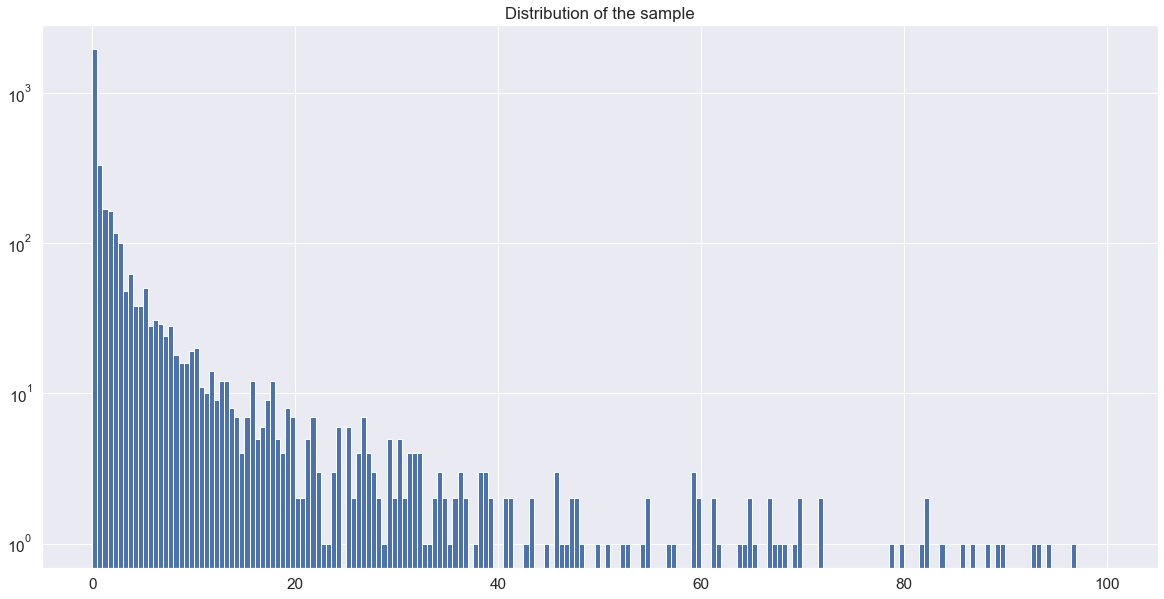

In [50]:
plt.figure(figsize=(20, 10))
plt.title("Distribution of the sample")
plt.hist(
    weibull_sample,
    bins=np.linspace(0,100,201)
)
plt.yscale('log')
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам сравнить два способа рещения этой проблемы:

1. Отбросить нули до построения эмпирической функции распределения $\hat{F}(x)$
2. Построить эмпирическую функцию, а затем учитывать только те точки, x-координата которых положительна.

Для первого способа отфильтруйте выборку в ячейке ниже

In [20]:
weibull_sample_nz = weibull_sample[weibull_sample != np.min(weibull_sample)]

Для каждого способа подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. 

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_1 = ECDF(weibull_sample_nz)
ecdf_2 = ECDF(weibull_sample)

log_x = np.log(weibull_sample_nz)
log_y1 = np.log(- np.log(1 - ecdf_1(weibull_sample_nz)))
log_y2 = np.log(- np.log(1 - ecdf_2(weibull_sample_nz)))

<ipython-input-21-733f4094f304>:7: RuntimeWarning: divide by zero encountered in log
  log_y1 = np.log(- np.log(1 - ecdf_1(weibull_sample_nz)))
<ipython-input-21-733f4094f304>:8: RuntimeWarning: divide by zero encountered in log
  log_y2 = np.log(- np.log(1 - ecdf_2(weibull_sample_nz)))


Постройте график (`plt.scatter`) для первого способа красным цветом, а для второго — синим. Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

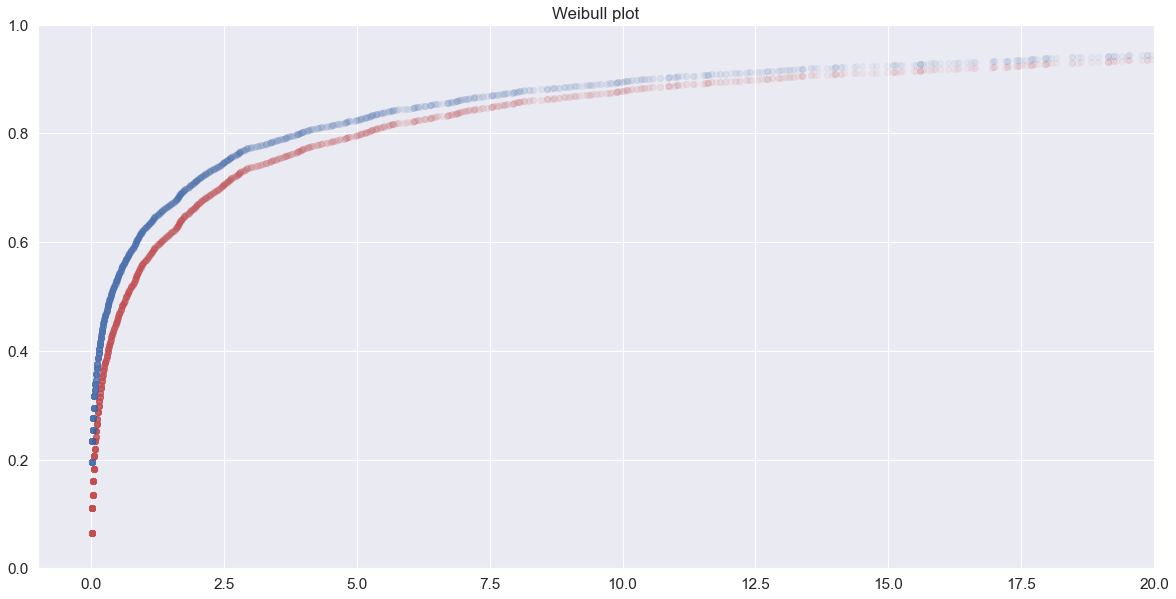

In [62]:
plt.figure(figsize=(20, 10))
plt.xlim(left=-1, right=20)
plt.ylim (0, 1)
plt.scatter(weibull_sample_nz, ecdf_1(weibull_sample_nz), alpha=0.05, color='r', label='First method')
plt.scatter(weibull_sample_nz, ecdf_2(weibull_sample_nz), alpha=0.05, color='b', label='Second method')
plt.title("Weibull plot")
plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:** более правильным кажется второй способ. Используя первый метод, мы искусственно занижаем эмпирическую функцию распределения в точках, близких к нулю. Также второй способ выглядит логичнее, если исходить из того, что носитель включает в себя ноль, а значит совсем выкидывать эту точку из рассмотрения нелогично. С другой стороны, график функции распределения Вейбулла должен выходить из нуля. С этой точки зрения первый способ выглядит более правильным.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [31]:
samples = np.array([weibull_sample_nz[:1460], weibull_sample_nz], dtype=object)
g_variants = np.linspace(-2, 2, 4001)
ans = np.zeros(2)
i = 0
for sample in samples:
    max = 0
    for gamma in g_variants:
        x = 10 ** gamma
        likelyhood = np.log(sample ** (x - 1)).sum() - (sample ** x).sum() + sample.shape[0]*np.log(x)
        if ((likelyhood > max) or (gamma == -2)):
            max = likelyhood
            ans[i] = x
    i += 1
ans

array([0.41399967, 0.4102041 ])

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [34]:
gamma_fit = sps.weibull_min.fit(weibull_sample_nz, fscale=1, floc=0)[0]
gamma_fit

0.41025390624999947

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод:** можно заметить, что на отрезке [-2, 2] (вне этого отрезка оба графика не ведут себя как y = gamma_fit * x) оба способа дают неидеальный результат. График, построенный с помощью первого метода имеет почти тот же наклон, что и график y = gamma_fit * x, но оказывается смещенным вниз по y. График, построенный с помощью второго метода не имеет смещения по шкале y(проходит через ноль), но его уклон не совпадает с уклоном графика y = gamma_fit * x. 

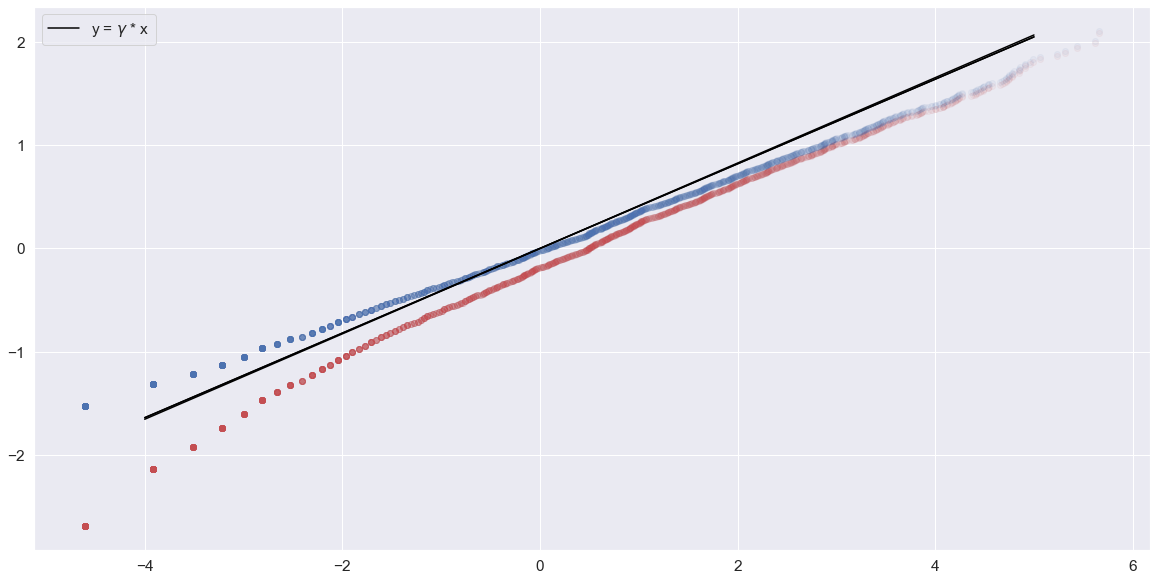

In [68]:
plt.figure(figsize=(20, 10))
plt.scatter(log_x, log_y1, alpha=0.05, color='r')
plt.scatter(log_x, log_y2, alpha=0.05, color='b')
x = np.array([-4, 5])
plt.plot(x, gamma_fit*x, color='black', label = 'y = $\gamma$ * x')
plt.plot(x, ans[0]*x, color='black')
plt.plot(x, ans[1]*x, color='black')
plt.plot()
plt.legend()
plt.show()

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

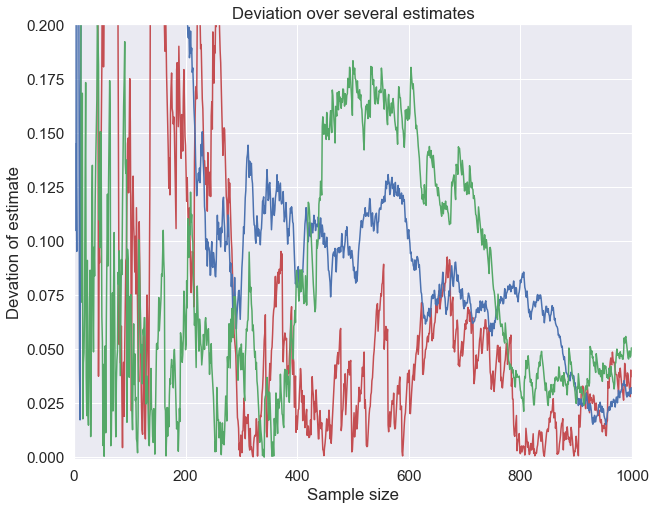

In [39]:
THETA = 3
N = 1000

s_norm = sps.norm(loc=0, scale = np.sqrt(THETA)).rvs(size=N)
s_uni = sps.uniform(loc=0, scale=THETA).rvs(size=N)
s_gamma = sps.gamma(a=1, loc=0,scale=THETA).rvs(size=N)

theta_norm_mm = (np.cumsum(s_norm ** 2) / np.arange(1, N+1))
theta_uni_mm = 2*(np.cumsum(s_uni) / np.arange(1, N+1))
theta_gamma_mm = np.cumsum(s_gamma) / np.arange(1, N+1)

estimates = [theta_norm_mm, theta_uni_mm, theta_gamma_mm]
colors = ["r", "b", "g"]
plt.figure(figsize=(10,8))
plt.title("Deviation over several estimates")
for (estimate, color) in zip(estimates, colors):
    plt.plot(range(int(N)), abs(estimate - THETA), color=color)
plt.xlim(0, N)
plt.ylim(-0.001, 0.2)
plt.xlabel("Sample size")
plt.ylabel("Devation of estimate")
plt.show()

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [40]:
list_k = [10] + [50] + list(range(100, 1001, 100))
samples = np.zeros((12, 1000, 1000))
sample = s_norm
i = 0
for k in list_k:
    for j in range(k):
        for t in range(k):
            samples[i][j][t] = sample[np.random.randint(k)]
    i += 1
i = 0
theta = np.zeros((12))
for k in list_k:
    theta[i] = ((samples[i] ** 2).sum(axis=1) / k).sum() / k
    i += 1
i = 0
distr = np.zeros((12))
for k in list_k:
    distr[i] = ((((samples[i] ** 2).sum(axis=1) / k) - theta[i]) ** 2).sum() / k
    i += 1

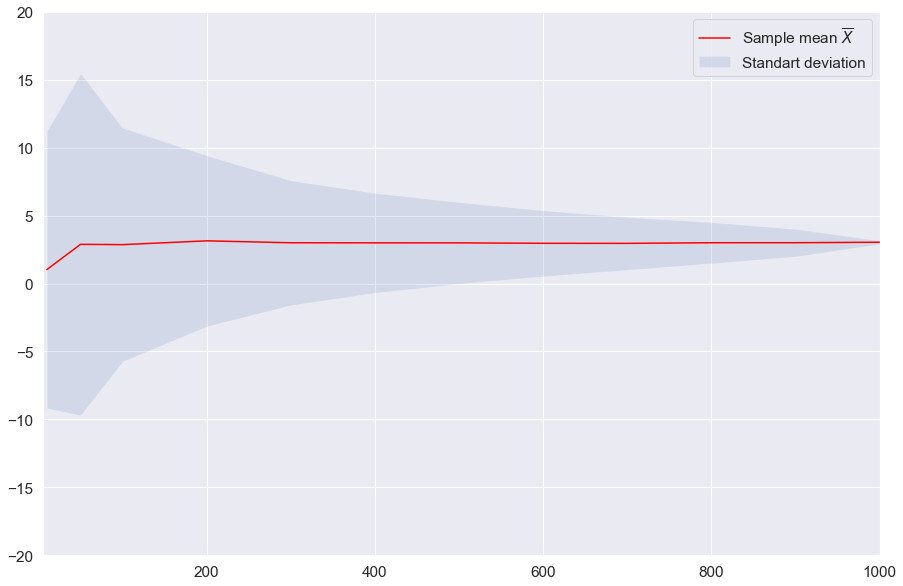

In [69]:
plt.figure(figsize=(15, 10))
plt.plot(
    list_k, 
    theta, 
    color='red',  
    label='Sample mean $\overline{X}$'
) 
plt.fill_between(
    x=list_k, 
    y1=theta + np.sqrt(distr),
    y2=theta - np.sqrt(distr),
    alpha=0.15, 
    label='Standart deviation'
)
plt.xlim(5,1000)
plt.ylim(-20,20)
plt.legend()
plt.show()

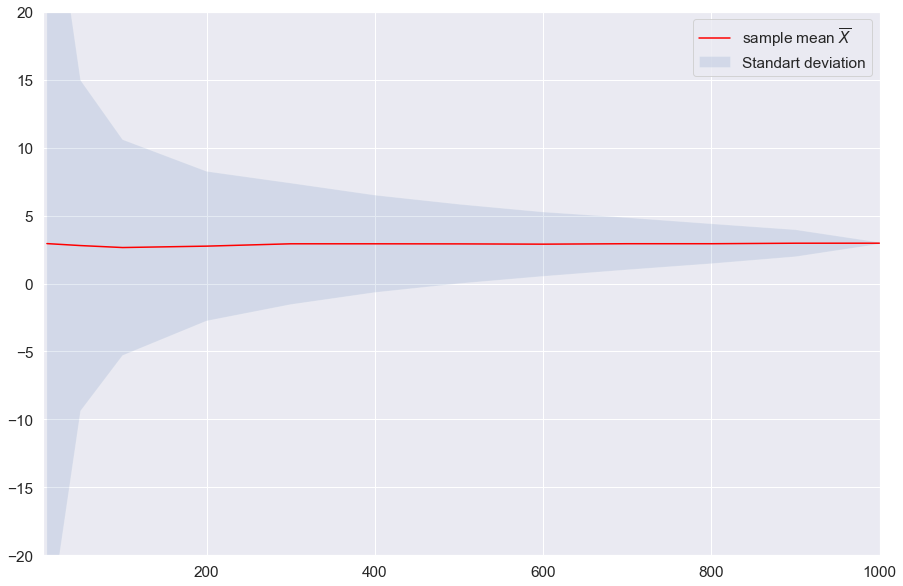

In [70]:
list_k = [10] + [50] + list(range(100, 1001, 100))
samples = np.zeros((12, 1000, 1000))
sample = s_uni
i = 0
for k in list_k:
    for j in range(k):
        for t in range(k):
            samples[i][j][t] = sample[np.random.randint(k)]
    i += 1
i = 0
theta = np.zeros((12))
for k in list_k:
    theta[i] = (2 * ((samples[i]).sum(axis=1) / k)).sum() / k
    i += 1
i = 0
distr = np.zeros((12))
for k in list_k:
    distr[i] = ((2 * ((samples[i]).sum(axis=1) / k) - theta[i]) ** 2).sum() / k
    i += 1
plt.figure(figsize=(15, 10))
plt.plot(
    list_k, 
    theta, 
    color='red',  
    label='sample mean $\overline{X}$'
) 
plt.fill_between(
    x=list_k, 
    y1=theta + np.sqrt(distr),
    y2=theta - np.sqrt(distr),
    alpha=0.15,
    label='Standart deviation'
)
plt.xlim(5,1000)
plt.ylim(-20,20)
plt.legend()
plt.show()

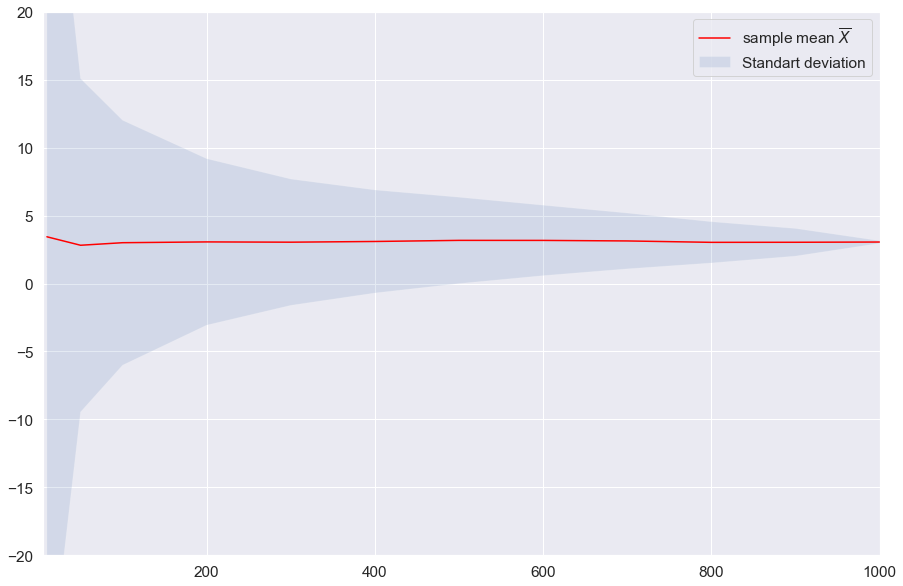

In [71]:
list_k = [10] + [50] + list(range(100, 1001, 100))
samples = np.zeros((12, 1000, 1000))
sample = s_gamma
i = 0
for k in list_k:
    for j in range(k):
        for t in range(k):
            samples[i][j][t] = sample[np.random.randint(k)]
    i += 1
i = 0
theta = np.zeros((12))
for k in list_k:
    theta[i] = ((samples[i]).sum(axis=1) / k).sum() / k
    i += 1
i = 0
distr = np.zeros((12))
for k in list_k:
    distr[i] = ((((samples[i]).sum(axis=1) / k) - theta[i]) ** 2).sum() / k
    i += 1
plt.figure(figsize=(15, 10))
plt.plot(
    list_k, 
    theta, 
    color='red',  
    label='sample mean $\overline{X}$'
) 
plt.fill_between(
    x=list_k, 
    y1=theta + np.sqrt(distr),
    y2=theta - np.sqrt(distr),
    alpha=0.15,
    label='Standart deviation'
)
plt.xlim(5,1000)
plt.ylim(-20,20)
plt.legend()
plt.show()

Вывод: заметим, что и оценка методом моментов, и бутстрепные оценки достаточно точно оценивают параметр \theta$. Также заметим, что дисперсия, посчтанная с помощью бутстрепных выборок уменьшается с увеличением К, и при K = N становится преденебрежимо малой.